In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
print("Training Data size: ",X_train.shape) #data is in pixel value form, a 3D array
print("Testing Data Size: ",X_test.shape)
X_train[0]

Training Data size:  (60000, 28, 28)
Testing Data Size:  (10000, 28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

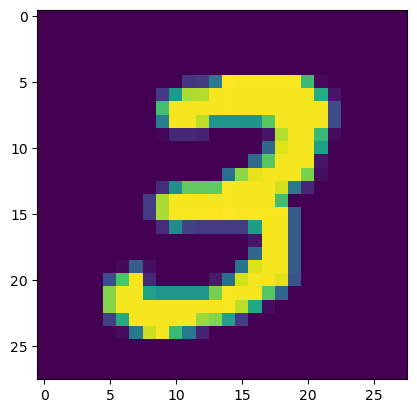

In [6]:
plt.imshow(X_train[7])

In [7]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784. 
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED) 
X_test = X_test.reshape(10000, RESHAPED) 

# Data is converted into float32 to use 32-bit precision # when training a neural network 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255
print(X_train.shape[0], 'train samples') 
print(X_test.shape[0], 'test samples') 

# One-hot representation of the labels.
y_train = tf.keras.utils.to_categorical(y_train, 10) 
y_test = tf.keras.utils.to_categorical(y_test, 10)


60000 train samples
10000 test samples


In [9]:
model = Sequential()

model.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Training the model. 
training = model.fit(X_train, y_train, batch_size=64, epochs=70, validation_split=0.2) 

Epoch 1/70
750/750 [==============================] - 11s 13ms/step - loss: 2.3021 - accuracy: 0.1141 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 2/70
750/750 [==============================] - 5s 6ms/step - loss: 2.3013 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 3/70
750/750 [==============================] - 4s 5ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 4/70
750/750 [==============================] - 4s 5ms/step - loss: 2.3009 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 5/70
750/750 [==============================] - 4s 6ms/step - loss: 2.3007 - accuracy: 0.1140 - val_loss: 2.3017 - val_accuracy: 0.1060
Epoch 6/70
750/750 [==============================] - 4s 5ms/step - loss: 2.3006 - accuracy: 0.1140 - val_loss: 2.3016 - val_accuracy: 0.1060
Epoch 7/70
750/750 [==============================] - 4s 5ms/step - loss: 2.3005 - accuracy: 0.1140 - val_loss: 2.3015 - val_accuracy: 0.1060
Epoc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


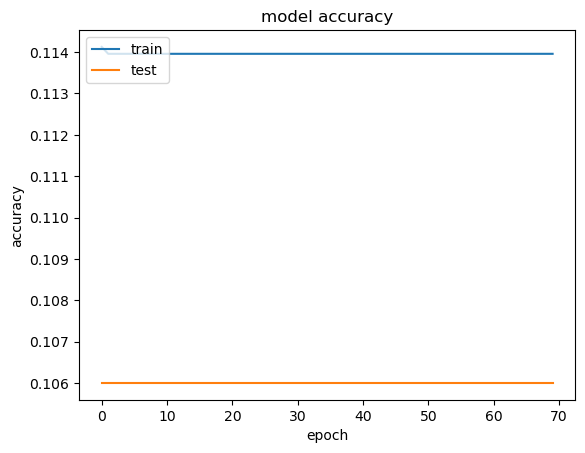

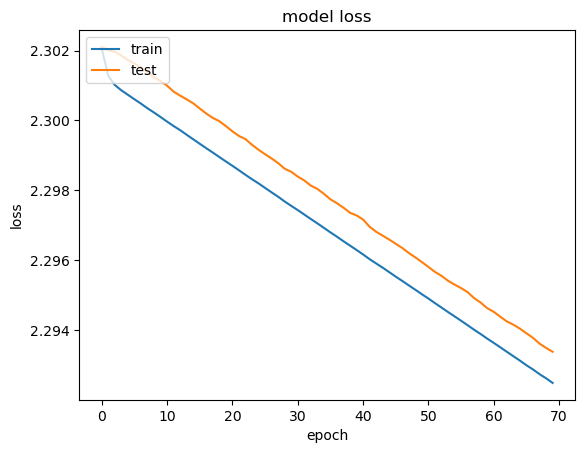

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in training
print(training.history.keys())

# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
#evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 2.2922 - accuracy: 0.1135
Test accuracy: 0.11349999904632568


In [19]:
#Most common type of model is a stack of layers
model_2 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:

model_2.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)

# Adding another dense layer:
model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
# After the first layer, you don't need to specify the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

# Compiling the model.
model_2.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model. 
training = model_2.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.2) 

Epoch 1/100
750/750 [==============================] - 6s 7ms/step - loss: 2.3006 - accuracy: 0.1160 - val_loss: 2.3006 - val_accuracy: 0.1060
Epoch 2/100
750/750 [==============================] - 5s 7ms/step - loss: 2.3000 - accuracy: 0.1140 - val_loss: 2.3007 - val_accuracy: 0.1060
Epoch 3/100
750/750 [==============================] - 5s 7ms/step - loss: 2.2998 - accuracy: 0.1140 - val_loss: 2.3007 - val_accuracy: 0.1060
Epoch 4/100
750/750 [==============================] - 5s 7ms/step - loss: 2.2997 - accuracy: 0.1140 - val_loss: 2.3006 - val_accuracy: 0.1060
Epoch 5/100
750/750 [==============================] - 5s 6ms/step - loss: 2.2996 - accuracy: 0.1140 - val_loss: 2.3005 - val_accuracy: 0.1060
Epoch 6/100
750/750 [==============================] - 5s 6ms/step - loss: 2.2994 - accuracy: 0.1140 - val_loss: 2.3003 - val_accuracy: 0.1060
Epoch 7/100
750/750 [==============================] - 4s 6ms/step - loss: 2.2993 - accuracy: 0.1140 - val_loss: 2.3002 - val_accuracy: 0.1060

Epoch 58/100
750/750 [==============================] - 5s 6ms/step - loss: 2.2496 - accuracy: 0.1990 - val_loss: 2.2469 - val_accuracy: 0.1859
Epoch 59/100
750/750 [==============================] - 5s 6ms/step - loss: 2.2440 - accuracy: 0.1995 - val_loss: 2.2409 - val_accuracy: 0.2069
Epoch 60/100
750/750 [==============================] - 5s 6ms/step - loss: 2.2375 - accuracy: 0.2029 - val_loss: 2.2333 - val_accuracy: 0.1949
Epoch 61/100
750/750 [==============================] - 5s 6ms/step - loss: 2.2300 - accuracy: 0.2092 - val_loss: 2.2253 - val_accuracy: 0.2046
Epoch 62/100
750/750 [==============================] - 5s 7ms/step - loss: 2.2216 - accuracy: 0.2258 - val_loss: 2.2163 - val_accuracy: 0.2006
Epoch 63/100
750/750 [==============================] - 5s 6ms/step - loss: 2.2117 - accuracy: 0.2341 - val_loss: 2.2057 - val_accuracy: 0.2907
Epoch 64/100
750/750 [==============================] - 5s 6ms/step - loss: 2.2004 - accuracy: 0.2511 - val_loss: 2.1930 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


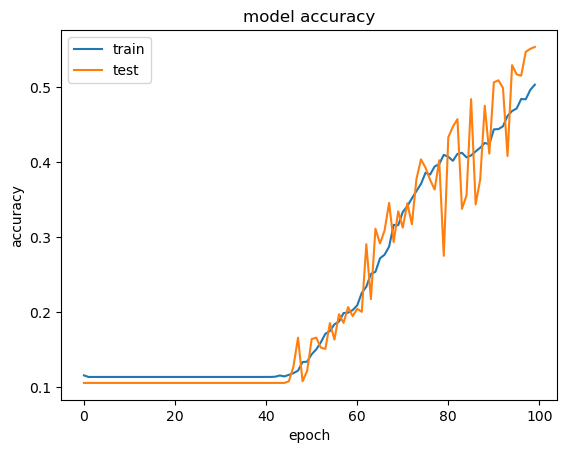

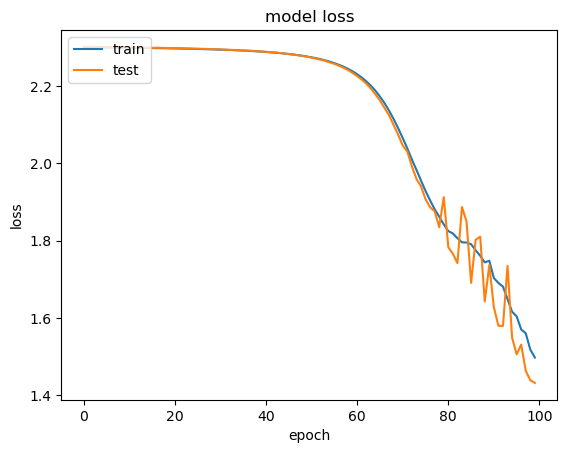

In [20]:
# list all data in training
print(training.history.keys())

# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
#evaluate the model
test_loss, test_acc = model_2.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 1.4363 - accuracy: 0.5443
Test accuracy: 0.5443000197410583


In [8]:
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_4 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_4.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_4.add(Dropout(0.3))
# Adding another dense layer:
model_4.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_4.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_4.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

# Compiling the model.
model_4.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Training the model. 
training = model_4.fit(X_train, y_train, batch_size=128, epochs=31, validation_split=0.2) 


Epoch 1/31
375/375 [==============================] - 26s 63ms/step - loss: 0.3015 - accuracy: 0.9081 - val_loss: 0.1342 - val_accuracy: 0.9593
Epoch 2/31
375/375 [==============================] - 25s 68ms/step - loss: 0.1290 - accuracy: 0.9609 - val_loss: 0.1113 - val_accuracy: 0.9657
Epoch 3/31
375/375 [==============================] - 24s 64ms/step - loss: 0.0939 - accuracy: 0.9705 - val_loss: 0.0818 - val_accuracy: 0.9753
Epoch 4/31
375/375 [==============================] - 25s 67ms/step - loss: 0.0737 - accuracy: 0.9761 - val_loss: 0.0780 - val_accuracy: 0.9765
Epoch 5/31
375/375 [==============================] - 24s 63ms/step - loss: 0.0638 - accuracy: 0.9800 - val_loss: 0.0800 - val_accuracy: 0.9763
Epoch 6/31
375/375 [==============================] - 25s 66ms/step - loss: 0.0517 - accuracy: 0.9835 - val_loss: 0.0732 - val_accuracy: 0.9789
Epoch 7/31
375/375 [==============================] - 36s 95ms/step - loss: 0.0447 - accuracy: 0.9851 - val_loss: 0.0775 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


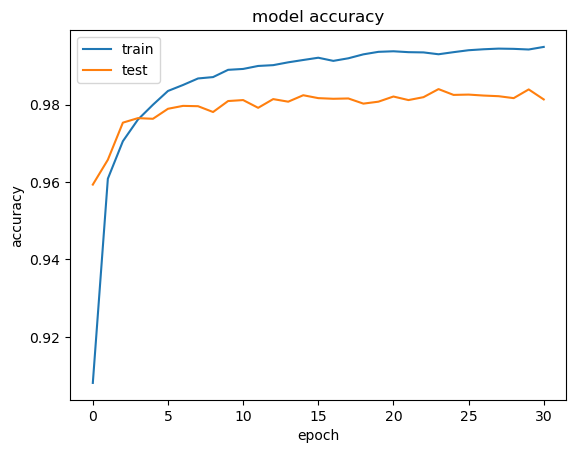

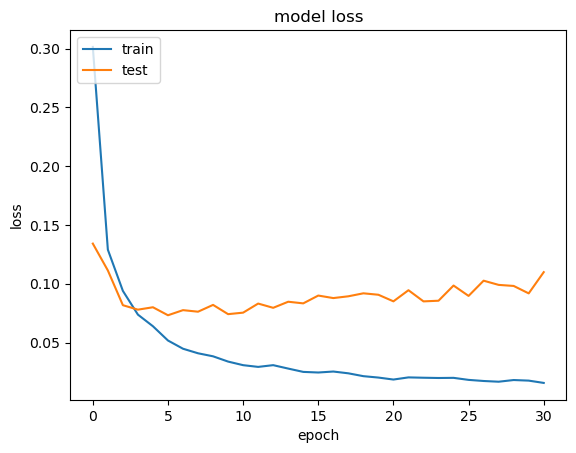

In [9]:
# list all data in training
print(training.history.keys())

# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [10]:
#evaluate the model
test_loss, test_acc = model_4.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.0865 - accuracy: 0.9826
Test accuracy: 0.9825999736785889


In [1]:
import os;
print(os.getcwd())

E:\Rohan\Data\Machine Learning


In [12]:
model_4.save("my_model")
print("Model Saved successfully")

INFO:tensorflow:Assets written to: my_model\assets
Model Saved successfully


In [30]:
y_prob = model_4.predict(X_test)
y_prob

313/313 [==============================] - 2s 6ms/step


array([[1.64935727e-08, 2.75957834e-08, 2.43375916e-06, ...,
        9.99962389e-01, 6.11792146e-08, 1.18594598e-05],
       [1.26512238e-11, 6.29635688e-05, 9.99927819e-01, ...,
        5.62453140e-10, 1.31962246e-08, 3.69609709e-16],
       [4.27407763e-08, 9.99043524e-01, 6.42236773e-05, ...,
        7.53090892e-04, 8.10959609e-05, 3.74787241e-08],
       ...,
       [4.07683517e-13, 1.70576187e-09, 1.13897615e-11, ...,
        3.05450413e-07, 5.11135489e-08, 2.59395006e-06],
       [1.29287752e-11, 2.73337264e-09, 2.26109409e-12, ...,
        6.51324372e-09, 1.93039773e-06, 5.02283328e-12],
       [4.32170353e-08, 3.73292813e-10, 6.98046279e-08, ...,
        1.05835744e-13, 1.78053838e-08, 7.77525058e-11]], dtype=float32)

In [31]:
y_pred = y_prob.argmax(axis =1)#basically it finds the maximum probabilty from the pixel data and predicts which number is it
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)